# The types of films you should create

#### Author: Caleb Kimondo
---

## Overview

There is an observation of big companies creating original content and my company wants to join on the hype. So, it decided to create a new movie studio. However, it faces one major issue: it doesn't know anything about creating movies. My objective is to explore and find out what films are currently doing the best at the box office and further use these insights to help the head of the company's new movie studio to decide what type of films to create.

## Data Understanding
---

Let's import the needed packages.

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

Below, I am going to create functions that will help us later on.

In [2]:
# This shows us the number of duplicates and the duplicates in a dataset
def duplicates(df, subset):
    duplicates = df[df.duplicated(subset=subset)]
    print(f"Number of duplicates: {len(duplicates)}")
    print("Duplicates:")
    print(duplicates)
    return 0

# This shows us the number of null values in the columns of a dataset in terms of percentages
def percent_missing(df):
    percent_missing_f = df.isnull().sum() * 100 / len(df)
    percent_missing_f = percent_missing_f.sort_values(ascending = False)
    print (percent_missing_f)
    return 0

Let's create variables and assign datasets to them so that they will be our dataframes.

In [17]:
# Create variables to save the datasets
gross_income = pd.read_csv('zippedData/bom.movie_gross.csv')

# Connect to the database
conn = sqlite3.connect('zippedData/im.db')
cur = conn.cursor()

First, let's view the data sets to understand them at first glance. Secondly, let's dive into the databases and explore their shape and what they contain.

In [4]:
# View the data sets
gross_income.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
# Observing the information of the data that the dataset contains
print(gross_income.info())

# Skips a line to enhance readability
print("\n")

# This shows us the number of null values in the columns of the dataset in terms of percentages
percent_missing(gross_income)

# Skips a line to enhance readability
print("\n") 

# Checks if there are any duplicates using the 'title' and 'year' columns since some movies can share the same title
duplicates(gross_income, ('title','year'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


foreign_gross     39.858282
domestic_gross     0.826690
studio             0.147623
year               0.000000
title              0.000000
dtype: float64


Number of duplicates: 0
Duplicates:
Empty DataFrame
Columns: [title, studio, domestic_gross, foreign_gross, year]
Index: []


0

Since we have working with a database, we need to understand the schema of each table that the database contains. 

In [18]:
newline_indent = '\n   '

conn.text_factory = str

result = cur.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()
table_names = sorted(list(zip(*result))[0])
print ("\ntables are:"+newline_indent+newline_indent.join(table_names))

for table_name in table_names:
    result = cur.execute("PRAGMA table_info('%s')" % table_name).fetchall()
    column_names = list(zip(*result))[1]
    print (("\ncolumn names for %s:" % table_name)
           +newline_indent
           +(newline_indent.join(column_names)))



tables are:
   directors
   known_for
   movie_akas
   movie_basics
   movie_ratings
   persons
   principals
   writers

column names for directors:
   movie_id
   person_id

column names for known_for:
   person_id
   movie_id

column names for movie_akas:
   movie_id
   ordering
   title
   region
   language
   types
   attributes
   is_original_title

column names for movie_basics:
   movie_id
   primary_title
   original_title
   start_year
   runtime_minutes
   genres

column names for movie_ratings:
   movie_id
   averagerating
   numvotes

column names for persons:
   person_id
   primary_name
   birth_year
   death_year
   primary_profession

column names for principals:
   movie_id
   ordering
   person_id
   category
   job
   characters

column names for writers:
   movie_id
   person_id


By looking at the schema, we can see that vital information from the 'movies' dataset and the 'reviews' dataset are in the respective tables: 'movie_basics' and 'movie_ratings'. Therefore, we will not be using the two datasets.  

## Data preparation
---

### Dealing with missing values

#### Dropping based on null values

Let's revisit the datasets to know what columns have missing values, and their respective percentages.

In [40]:
# Shows percentage missing in each column
percent_missing(gross_income)

# Shows duplicates
duplicates(gross_income, ('title','year'))

total_gross       40.684972
foreign_gross     39.858282
domestic_gross     0.826690
studio             0.147623
year               0.000000
title              0.000000
dtype: float64
Number of duplicates: 0
Duplicates:
Empty DataFrame
Columns: [title, studio, domestic_gross, foreign_gross, year, total_gross]
Index: []


0

From above, we can see that the 'foreign_gross' column has approximately 40% missing values. However, the data in the column is important. Therefore I will drop rows that contain null values in the 'foreign_gross' column.

In [41]:
# Drops the rows with null values
gross_income = gross_income.dropna(subset=['foreign_gross'])
percent_missing(gross_income)

total_gross       1.374570
domestic_gross    1.374570
studio            0.196367
year              0.000000
foreign_gross     0.000000
title             0.000000
dtype: float64


0

The 'domestic_gross' column has a small percentage of missing values. Let's drop the rows that contain null values in the 'domestic_gross' column.

In [42]:
# Drops rows that contain null values in the 'domestic_gross' column
gross_income = gross_income.dropna(subset=['domestic_gross'])
percent_missing(gross_income)

studio            0.099552
total_gross       0.000000
year              0.000000
foreign_gross     0.000000
domestic_gross    0.000000
title             0.000000
dtype: float64


0

The data is clean now as we do not have any missing values.

In [10]:
gross_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2009 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2009 non-null   float64
 3   foreign_gross   2009 non-null   object 
 4   year            2009 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.2+ KB


From above, we can see that 'foreign_gross' is of an object data type.

In [11]:
# Converts data to numeric
gross_income['foreign_gross'] = pd.to_numeric(gross_income['foreign_gross'])

ValueError: Unable to parse string "1,131.6" at position 1277

The error tells us that '1,131.6' is a string and cannot be parsed. This is due to the number having a comma. Let's remove the comma.

In [35]:
# Removes the comma
gross_income['foreign_gross'] = gross_income['foreign_gross'].str.replace(',','')

# Converts data to numeric (float64)
gross_income['foreign_gross'] = pd.to_numeric(gross_income['foreign_gross'])

Let's add a new column 'total_gross' that is the result of 'domestic_gross' + 'foreign_gross'.

In [36]:
# Adds the column together in order to create the 'total_gross' column
gross_income['total_gross'] = gross_income['domestic_gross'] + gross_income['foreign_gross']

In [37]:
gross_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
 5   total_gross     2009 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 158.9+ KB


## Data visualization
---

Let's create visualizations that will help us in making recommendations.

### What genre of movies should they make?

In [19]:
# Query the database to obtain the genres data
q = """
    SELECT primary_title ,genres, averagerating
    FROM movie_basics
    JOIN movie_ratings
    ON movie_basics.movie_id = movie_ratings.movie_id
    """
df = pd.read_sql(q, conn)

Let's observe the genres.

In [20]:
df

,primary_title,genres,averagerating
0,Sunghursh,"Action,Crime,Drama",7.0
1,One Day Before the Rainy Season,"Biography,Drama",7.2
2,The Other Side of the Wind,Drama,6.9
3,Sabse Bada Sukh,"Comedy,Drama",6.1
4,The Wandering Soap Opera,"Comedy,Drama,Fantasy",6.5
...,...,...,...
73851,Diabolik sono io,Documentary,6.2
73852,Sokagin Çocuklari,"Drama,Family",8.7
73853,Albatross,Documentary,8.5
73854,La vida sense la Sara Amat,None,6.6


First, let's check if there are duplicates and missing values.

In [21]:
# Shows the duplicates and the percentage of missing values in each column
duplicates(df, 'primary_title')
print("\n--------\n")
percent_missing(df)

Number of duplicates: 3863
Duplicates:
                         primary_title                genres  averagerating
804    Raggarjävlar (Swedish Greasers)           Documentary            6.9
1264                          The Door                 Drama            6.5
1841                               Eva  Drama,Fantasy,Sci-Fi            6.7
1960                      Lost in Love                 Drama            7.2
1985                           Morning                 Drama            5.8
...                                ...                   ...            ...
73832                         Columbus                Comedy            5.8
73836                           Jessie       Horror,Thriller            8.5
73845                      Unstoppable           Documentary            8.1
73853                        Albatross           Documentary            8.5
73855                       Drømmeland           Documentary            6.5

[3863 rows x 3 columns]

--------

genres       

0

Let's drop the rows with missing values and the duplicates.

In [22]:
# Drops rows with null values in the genres column
df.dropna(subset=['genres'], inplace=True)
# Drops rows with duplicates in the primary_title column
df.drop_duplicates(subset = 'primary_title', inplace=True)

# Shows the duplicates and percentage of missing values per columns for confirmation
duplicates(df, 'primary_title')
print("\n--------\n")
percent_missing(df)

Number of duplicates: 0
Duplicates:
Empty DataFrame
Columns: [primary_title, genres, averagerating]
Index: []

--------

averagerating    0.0
genres           0.0
primary_title    0.0
dtype: float64


0

Some titles are categorized in different genres. That will be difficult for us to visualize with. Let's separate them so we can get a proper count of movies in a particular genre.

In [23]:
# Extracts the genres column and converts each value to a list
genre_series = df['genres'].dropna().apply(lambda x: x.split(','))
genre_series.head()

0      [Action, Crime, Drama]
1          [Biography, Drama]
2                     [Drama]
3             [Comedy, Drama]
4    [Comedy, Drama, Fantasy]
Name: genres, dtype: object

They still are not separated, but at least each value is now iterable which will make our work easier. Below we will create a list with dictionaries of every genre that is associated with a particular movie and the associated rating of that movie.

In [24]:
# This concatenates genre_series and the averagerating column from the dataset
genre_series1 = pd.concat([genre_series, df['averagerating']], axis = 1)

# The code below converts the series to lists so that they can be iterable
genres_list = df['genres'].tolist()
rating_list = df['averagerating'].tolist()

# The code below creates the list which the individual dicitonaries
genres_ratings_list = []
counter = 0
for list in genres_list:
    tmp = list.split(',')
    for entry in tmp:
        tmp1 = {}
        tmp1[entry] = rating_list[counter]
        genres_ratings_list.append(tmp1)
    counter = counter + 1

genres_ratings_list[:5]

[{'Action': 7.0},
 {'Crime': 7.0},
 {'Drama': 7.0},
 {'Biography': 7.2},
 {'Drama': 7.2}]

Our dataset is now prepared, let's now make visualizations.

### First Question

What genre of movies do studios generally focus on while making movies with? In other words, what amount of movies are either Drama, Comedy, Thriller, e.t.c

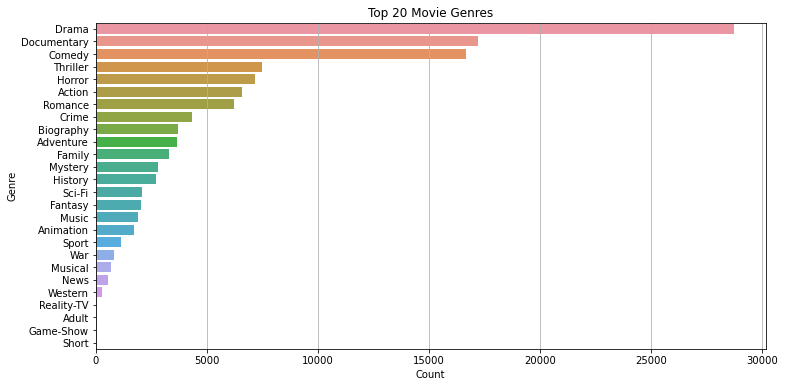

In [25]:
# This provides the distribution of genres
genres = [genre for sublist in genre_series for genre in sublist]
genre_counts = pd.Series(genres).value_counts()

# This is visualizing the data
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Top 20 Movie Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.grid(True, axis='x')
plt.show()

From the above visualization, we can see the top 3 genres that had the most movies made were Drama, Documentary and Comedy in order. This could mean that the more the demand the more the supply, so it would be sensible to make a movie which can be a documentary, drama or a comedy.

### Second Question

What genre of movies have the highest average ratings? Let's find out using the genres list we created. But since the list has ratings for every individual movie, we are going to use the values to calculate average ratings for every genre as a whole, using the ratings associated with its movie.

In [49]:
# Converts the genres list to a list with its distinct values
genres_list = pd.Series(genres).value_counts().index.to_list()
genres_list

['Drama',
 'Documentary',
 'Comedy',
 'Thriller',
 'Horror',
 'Action',
 'Romance',
 'Crime',
 'Biography',
 'Adventure',
 'Family',
 'Mystery',
 'History',
 'Sci-Fi',
 'Fantasy',
 'Music',
 'Animation',
 'Sport',
 'War',
 'Musical',
 'News',
 'Western',
 'Reality-TV',
 'Adult',
 'Game-Show',
 'Short']

In [27]:
#Create a value_counts function that will help us will getting the average rating per genre
value_counts = pd.Series(genres).value_counts()

In [28]:
# Dictionary that will contain the averages for each genre
genre_averagerating = {}

for genre in genres_list:
    rating = 0
    # For each genre, the loop will look for a matching genre, of a particular movie, and add the rating associated to it
    for entry in genres_ratings_list:
        for key, value in entry.items():
            if key == genre:
                rating = rating + value
    # Calculates the average
    average_rating = rating/value_counts[genre]
    # Adds to dictionary
    genre_averagerating[genre] = average_rating
    # Convert to series for visualizing
    genre_averagerating = pd.Series(genre_averagerating)

genre_averagerating

Drama          6.403203
Documentary    7.334903
Comedy         5.995563
Thriller       5.629908
Horror         4.996785
Action         5.819636
Romance        6.140393
Crime          6.115381
Biography      7.172160
Adventure      6.201390
Family         6.387929
Mystery        5.915514
History        7.048954
Sci-Fi         5.494118
Fantasy        5.928593
Music          7.107636
Animation      6.247920
Sport          6.974844
War            6.592089
Musical        6.485116
News           7.273535
Western        5.871483
Reality-TV     6.500000
Adult          3.766667
Game-Show      7.300000
Short          8.800000
dtype: float64

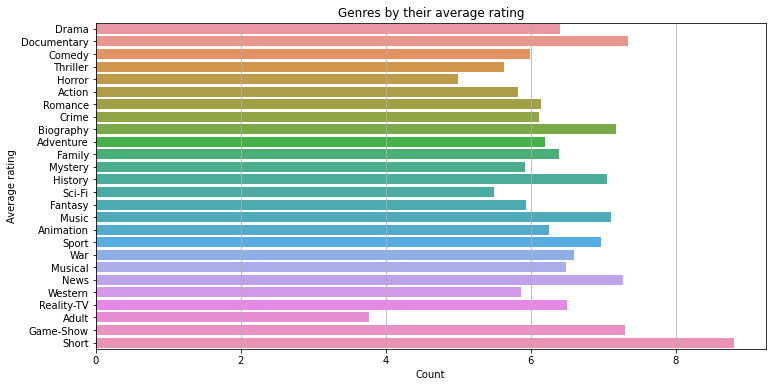

In [196]:
# This is visualizing the data
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_averagerating.values, y=genre_averagerating.index)
plt.title('Genres by their average rating')
plt.xlabel('Count')
plt.ylabel('Average rating')
plt.grid(True, axis='x')
plt.show()

From the above visualization, we can see Short had the highest average rating of over 8.5. However, in our previous visualization, we can see that Short had the lowest number of movies produced, so that is misleading. The ones that come after are news, documentary, biography, music, adventure and history. In our previous visualization, we saw that documentaries was the genre that had the second most titles produced. The number large number of documentaries produced supports the claim that documentaries are more likely to be enjoyed.

### Third question

Which genres make the most money? Let's find out. First, let's revisit the gross_income dataset.

In [29]:
gross_income.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


For this, I will be comparing the genres of the titles by the total_gross. This will require us to query the database. Let's do that below.

In [30]:
# Queries the database for the primary_title and genres
q = """
    SELECT primary_title, genres
    FROM movie_basics
    """
# Assigns the dataframe to a variable
df = pd.read_sql(q, conn)
df

,primary_title,genres
0,Sunghursh,"Action,Crime,Drama"
1,One Day Before the Rainy Season,"Biography,Drama"
2,The Other Side of the Wind,Drama
3,Sabse Bada Sukh,"Comedy,Drama"
4,The Wandering Soap Opera,"Comedy,Drama,Fantasy"
...,...,...
146139,Kuambil Lagi Hatiku,Drama
146140,Rodolpho Teóphilo - O Legado de um Pioneiro,Documentary
146141,Dankyavar Danka,Comedy
146142,6 Gunn,None


What we need to do next is merge the two dataframes (gross_income and df) based on similar values in the primary_title and title columns. Let's do that.

In [44]:
# Merges gross_income and df (the dataframe from above) based on similar values title and primary_title
df2 = gross_income.merge(df, how='inner', left_on='title', right_on='primary_title')
df2

,title,studio,domestic_gross,foreign_gross,year,total_gross,primary_title,genres
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,Toy Story 3,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,Inception,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08,Shrek Forever After,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,6.985000e+08,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,6.239000e+08,Iron Man 2,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...
2014,Bilal: A New Breed of Hero,VE,491000.0,1700000.0,2018,2.191000e+06,Bilal: A New Breed of Hero,"Action,Adventure,Animation"
2015,I Still See You,LGF,1400.0,1500000.0,2018,1.501400e+06,I Still See You,"Fantasy,Thriller"
2016,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,9.540000e+05,The Catcher Was a Spy,"Biography,Drama,War"
2017,Time Freak,Grindstone,10000.0,256000.0,2018,2.660000e+05,Time Freak,"Comedy,Drama,Romance"


Before we use it, we need to check if there is missing data either in the 'genres' column or the 'total_gross' column as those are the important columns.

In [45]:
# Shows the percentage of missing values in each column in the dataframe
percent_missing(df2)

genres            1.337296
primary_title     0.000000
total_gross       0.000000
year              0.000000
foreign_gross     0.000000
domestic_gross    0.000000
studio            0.000000
title             0.000000
dtype: float64


0

There are some missing values in the 'genres' column. Let's drop the rows with missing values in the 'genres' column.

In [46]:
# Drops rows with null values in the genres column
df2 = df2.dropna(subset=['genres'])

# Shows the percentage of missing values per column for confirmation
percent_missing(df2)

genres            0.0
primary_title     0.0
total_gross       0.0
year              0.0
foreign_gross     0.0
domestic_gross    0.0
studio            0.0
title             0.0
dtype: float64


0

What we need to do next is similar to the second question. We need to take the average total gross income that each genre made using the data of the associated movies. In the second question we had made a list of distinct values of genres, let's revisit it.

In [222]:
genres_list

['Drama',
 'Documentary',
 'Comedy',
 'Thriller',
 'Horror',
 'Action',
 'Romance',
 'Crime',
 'Biography',
 'Adventure',
 'Family',
 'Mystery',
 'History',
 'Sci-Fi',
 'Fantasy',
 'Music',
 'Animation',
 'Sport',
 'War',
 'Musical',
 'News',
 'Western',
 'Reality-TV',
 'Adult',
 'Game-Show',
 'Short']

In [47]:
# The code below converts the series to lists so that they can be iterable
genres_list = df2['genres'].tolist()
gross_list = df2['total_gross'].tolist()

# The code below creates the list which the individual dicitonaries
genres_gross_list = []
counter = 0
for list in genres_list:
    tmp = list.split(',')
    for entry in tmp:
        tmp1 = {}
        tmp1[entry] = gross_list[counter]
        genres_gross_list.append(tmp1)
    counter = counter + 1

genres_gross_list[:5]

[{'Adventure': 1067000000.0},
 {'Animation': 1067000000.0},
 {'Comedy': 1067000000.0},
 {'Action': 828300000.0},
 {'Adventure': 828300000.0}]

In [52]:
# Dictionary that will contain the averages for each genre
genre_average_gross = {}

for genre in genres_list:
    gross = 0
    # For each genre, the loop will look for a matching genre, of a particular movie, and add the total gross income associated to it
    for entry in genres_gross_list:
        for key, value in entry.items():
            if key == genre:
                gross = gross + value
    # Calculates the average
    average_gross = gross/value_counts[genre]
    # Adds to dictionary
    genre_average_gross[genre] = average_gross
    # Convert to series for visualizing
    genre_average_gross = pd.Series(genre_average_gross)

genre_average_gross

Drama          2.501712e+06
Documentary    6.536185e+05
Comedy         4.693984e+06
Thriller       4.709292e+06
Horror         2.257044e+06
Action         1.626551e+07
Romance        2.609668e+06
Crime          4.438156e+06
Biography      3.720011e+06
Adventure      3.265904e+07
Family         4.223122e+06
Mystery        4.313807e+06
History        2.406576e+06
Sci-Fi         1.862513e+07
Fantasy        1.374168e+07
Music          1.915755e+06
Animation      2.310236e+07
Sport          3.856602e+06
War            9.949529e+05
Musical        1.857998e+06
News           1.236306e+05
Western        4.539400e+06
Reality-TV     0.000000e+00
Adult          0.000000e+00
Game-Show      0.000000e+00
Short          0.000000e+00
dtype: float64

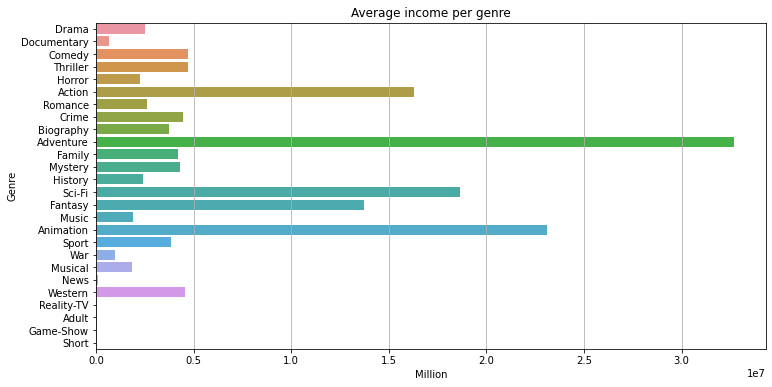

In [55]:
# This is visualizing the data
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_average_gross.values, y=genre_average_gross.index)
plt.title('Average income per genre')
plt.xlabel('Million')
plt.ylabel('Genre')
plt.grid(True, axis='x')
plt.show()

From the visualization, we can see the movies that were associated with the 'Adventure' genre made the most gross income, followed by 'Animation','Sci-Fi' and 'Action'.

## Recommendations

From the last two visualizations, we can see that the adventure genre had a good average rating (approximately 7) and it accrues the most gross income among all genres. Moreover, from the data, we can see that only less than 5000 titles have been produced. This shows that there is a potential desire for adventure movies. The same does apply to animation and Sci-Fi as they get an approximate of an average rating of 6 and over 5 respectively and they are second and third in most gross income respectively and both also have less than 5000 titles that were produced. Therefore, from my analysis, I would recommend making adventure, animation and/or sci-fi titles.